## Importing necessary Libraries 

In [109]:
import sklearn.datasets
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import sklearn.neighbors._base
from sklearn.utils import _safe_indexing
from sklearn.metrics import classification_report
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

### Loading the modified dataset

In [110]:
df = pd.read_csv('dataset/data_merged.csv')

In [111]:
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,...,valence_yr,popularity_yr,mode,key_0_yr,key_1_yr,key_2_yr,key_3_yr,key_4_yr,key_5_yr,key_6_yr
0,0.0131,0.2560,182347,0.895,0,0.000106,0.0821,-4.860,29,0.0707,...,0.583424,35.272231,1,0,0,1,0,0,0,0
1,0.9800,0.2770,206972,0.145,0,0.879000,0.1110,-19.898,0,0.0845,...,0.432251,3.672500,1,1,0,0,0,0,0,0
2,0.7950,0.6850,314667,0.483,0,0.878000,0.1130,-10.202,1,0.0337,...,0.447291,7.707000,1,0,0,0,1,0,0,0
3,0.6560,0.7880,179747,0.808,0,0.000000,0.1540,-6.590,0,0.0395,...,0.447291,7.707000,1,0,0,0,1,0,0,0
4,0.3020,0.0753,498560,0.150,0,0.884000,0.1210,-16.705,0,0.0371,...,0.443625,3.419500,1,1,0,0,0,0,0,0


## Printing the data and its basic statistical properties

In [112]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,...,valence_yr,popularity_yr,mode,key_0_yr,key_1_yr,key_2_yr,key_3_yr,key_4_yr,key_5_yr,key_6_yr
count,172230.000000,172230.000000,1.722300e+05,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,...,172230.000000,172230.000000,172230.0,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000
mean,0.501914,0.536246,2.326718e+05,0.480989,0.067956,0.194968,0.211396,-11.777780,25.925913,0.105896,...,0.525269,25.711704,1.0,0.365111,0.058857,0.096325,0.052262,0.329356,0.092243,0.005847
std,0.379394,0.175858,1.471768e+05,0.272032,0.251670,0.332974,0.180661,5.690105,21.866745,0.183053,...,0.055638,15.219180,0.0,0.481463,0.235358,0.295037,0.222555,0.469981,0.289369,0.076241
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,...,0.378276,0.090909,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091300,0.414000,1.662000e+05,0.248000,0.000000,0.000000,0.099300,-14.935750,1.000000,0.035200,...,0.478115,7.750543,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.523000,0.547000,2.057175e+05,0.463000,0.000000,0.000498,0.138000,-10.867000,26.000000,0.045400,...,0.538017,31.149276,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.896000,0.668000,2.656000e+05,0.708000,0.000000,0.238000,0.270000,-7.532000,42.000000,0.076000,...,0.563010,36.556552,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,1.000000,3.855000,100.000000,0.971000,...,0.669676,50.873598,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Printing the histogram of the data according to their popularity

Text(0, 0.5, 'Frequency')

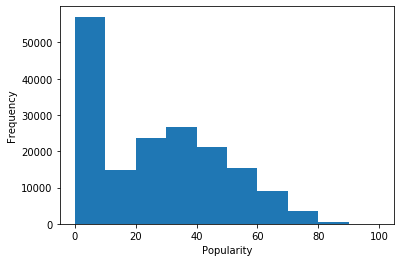

In [113]:
fig, ax = plt.subplots()
ax.hist(df["popularity"])
ax.set_xlabel("Popularity")
ax.set_ylabel("Frequency")

### We have arrived at the threshold from the billboard charts and hence can split the data to two labels. These two labels are popular and non-popular songs.

Discretizing the songs into two labels of popular and non-popular.
The songs with "probability" attribute less than 42 are non-popular.
The other ones are popular
The 0th label is the non-popular songs
The 1th label is the popular songs 
So, the dataset is imbalanced

In [114]:
mean_popularity = 42
df["popularity"] = [ 1 if i >= mean_popularity else 0 for i in df.popularity ]
df.popularity.value_counts()  

0    127131
1     45099
Name: popularity, dtype: int64

## Dropping the "popularity" attribute from the data frame and declairing it as the dependant variable or the  output

In [115]:
y = df["popularity"].values
X = df.drop(["popularity"],axis=1)

## Standardizing the data

In [115]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X.shape

## Splitting the data into trainig data and testing data. The test size is 0.2 of the total.

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

## Printing the dimensions of the arrays produced

In [116]:
X.shape, y.shape

((172230, 71), (172230,))

### Defining the model with its default hyperparameters

In [117]:
# Defining the model

model = Perceptron()
clf = Perceptron(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Running randomized gridsearch to reach the best set of hyperparameters

### Performing gridsearch to find the best hyperparameters for this specific dataset

In [118]:
clf1 = GridSearchCV(model, {
    'eta0' : [ 0.0001, 0.001, 0.01, 0.1, 1], 'max_iter' : [10, 100, 1000, 10000]}, cv = 2, return_train_score = False)

clf1.fit(X_train , y_train)
clf1.cv_results_

/home/runeelwazlib/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


{'mean_fit_time': array([0.16420233, 0.19187629, 0.19626534, 0.19239914, 0.19167411,
        0.19188261, 0.19243288, 0.19306827, 0.19492841, 0.19121671,
        0.19386804, 0.20033109, 0.22155106, 0.21996677, 0.21847248,
        0.22432661, 0.21803439, 0.24239576, 0.23211825, 0.2221868 ]),
 'std_fit_time': array([0.02825534, 0.00069487, 0.00184524, 0.00147712, 0.00048411,
        0.00033236, 0.000139  , 0.00130701, 0.00055528, 0.00101256,
        0.00232351, 0.00841773, 0.01516831, 0.01318514, 0.0142231 ,
        0.02046227, 0.01752675, 0.00436914, 0.00742424, 0.01401901]),
 'mean_score_time': array([0.02256966, 0.02855921, 0.02350259, 0.02219713, 0.0219053 ,
        0.02210879, 0.02195859, 0.02197325, 0.02179813, 0.02203023,
        0.02198386, 0.02161109, 0.02175951, 0.02282059, 0.02292705,
        0.02235281, 0.02310395, 0.02230012, 0.02443314, 0.02264738]),
 'std_score_time': array([9.67979431e-05, 5.98216057e-03, 3.59535217e-04, 8.97645950e-05,
        2.88605690e-04, 7.41481781e-

In [119]:
## Printing the accuracy scores for different permutations of the parameters eta0 and maximum iterations

df = pd.DataFrame(clf1.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta0,param_max_iter,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.164202,0.028255,0.022570,0.000097,0.0001,10,"{'eta0': 0.0001, 'max_iter': 10}",0.848996,0.808134,0.828565,0.020431,9
1,0.191876,0.000695,0.028559,0.005982,0.0001,100,"{'eta0': 0.0001, 'max_iter': 100}",0.848996,0.808134,0.828565,0.020431,9
2,0.196265,0.001845,0.023503,0.000360,0.0001,1000,"{'eta0': 0.0001, 'max_iter': 1000}",0.848996,0.808134,0.828565,0.020431,9
3,0.192399,0.001477,0.022197,0.000090,0.0001,10000,"{'eta0': 0.0001, 'max_iter': 10000}",0.848996,0.808134,0.828565,0.020431,9
4,0.191674,0.000484,0.021905,0.000289,0.001,10,"{'eta0': 0.001, 'max_iter': 10}",0.848996,0.808134,0.828565,0.020431,9
5,0.191883,0.000332,0.022109,0.000074,0.001,100,"{'eta0': 0.001, 'max_iter': 100}",0.848996,0.808134,0.828565,0.020431,9
6,0.192433,0.000139,0.021959,0.000092,0.001,1000,"{'eta0': 0.001, 'max_iter': 1000}",0.848996,0.808134,0.828565,0.020431,9
7,0.193068,0.001307,0.021973,0.000031,0.001,10000,"{'eta0': 0.001, 'max_iter': 10000}",0.848996,0.808134,0.828565,0.020431,9
8,0.194928,0.000555,0.021798,0.000191,0.01,10,"{'eta0': 0.01, 'max_iter': 10}",0.848996,0.808134,0.828565,0.020431,9
9,0.191217,0.001013,0.022030,0.000203,0.01,100,"{'eta0': 0.01, 'max_iter': 100}",0.848996,0.808134,0.828565,0.020431,9


### Running the classifier with the best set of hyperparameter (eta0 = 1 and maximum iterations = 10000)
Similar results were found with different permutations of these two hyperparameters. But we kept the maximum iterations (number of learning epochs) at its highest possible value for the sake of convergence.

Training the model with the best set of hyperparameters
eta0 = 1, maximum iterations = 10000
Different permutations of hyperparameters gave the same mean_test_score
We kept the maximum iterations at its highest possible value for the sake of convergence

In [131]:
clf = Perceptron(random_state=0, max_iter=10000, eta0 = 1).fit(X_train, y_train)
y_pred = clf.predict(X_train)

## Printing the accuracy score

In [131]:
accuracy_score(y_train, y_pred)

0.8115673808279626

## Predicting the y value with the aforementioned hyperparameters

In [132]:
y_pred = clf.predict(X_test)

## Printing the accuracy score

In [132]:
accuracy_score(y_pred, y_test)

0.8133019799105847

### Printing the confusion matrix

## Printing confusion matrix to see the accuracy of the actual positives, the false positives and actual negatives and the false negatives

In [133]:
print(confusion_matrix(y_test, y_pred))

[[23494  1996]
 [ 4435  4521]]


### Printing the classification report

## Printing the classification report to see the precision and recall for the different classes

In [134]:
print(classification_report(y_test, y_pred))
print("Classification report\n")

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     25490
           1       0.69      0.50      0.58      8956

    accuracy                           0.81     34446
   macro avg       0.77      0.71      0.73     34446
weighted avg       0.80      0.81      0.80     34446

Classification report

